In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [ ]:
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ptbdb_abnormal.csv
/kaggle/input/mitbih_train.csv
/kaggle/input/ptbdb_normal.csv
/kaggle/input/mitbih_test.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/mitbih_test.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/mitbih_test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mitbih_test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


In [ ]:
df1.head(5)

1.000000000000000000e+00  7.582644820213317871e-01  \
0                  0.908425                  0.783883   
1                  0.730088                  0.212389   
2                  1.000000                  0.910417   
3                  0.570470                  0.399329   
4                  1.000000                  0.923664   

   1.115702465176582336e-01  0.000000000000000000e+00  \
0                  0.531136                  0.362637   
1                  0.000000                  0.119469   
2                  0.681250                  0.472917   
3                  0.238255                  0.147651   
4                  0.656489                  0.195929   

   8.057851344347000122e-02  7.851240038871765137e-02  \
0                  0.366300                  0.344322   
1                  0.101770                  0.101770   
2                  0.229167                  0.068750   
3                  0.000000                  0.003356   
4                  0.111959                  0.175573   

   6.611569970846176147e-02  4.958677664399147034e-02  \
0                  0.333333                  0.307692   
1                  0.110619                  0.123894   
2                  0.000000                  0.004167   
3                  0.040268                  0.080537   
4                  0.122137                  0.050891   

   4.752065986394882202e-02  3.512396663427352905e-02  ...  \
0                  0.296703                  0.300366  ...   
1                  0.115044                  0.132743  ...   
2                  0.014583                  0.054167  ...   
3                  0.070470                  0.090604  ...   
4                  0.035623                  0.055980  ...   

   0.000000000000000000e+00.56  0.000000000000000000e+00.57  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.58  0.000000000000000000e+00.59  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.60  0.000000000000000000e+00.61  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.62  0.000000000000000000e+00.63  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.64  0.000000000000000000e+00.65  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

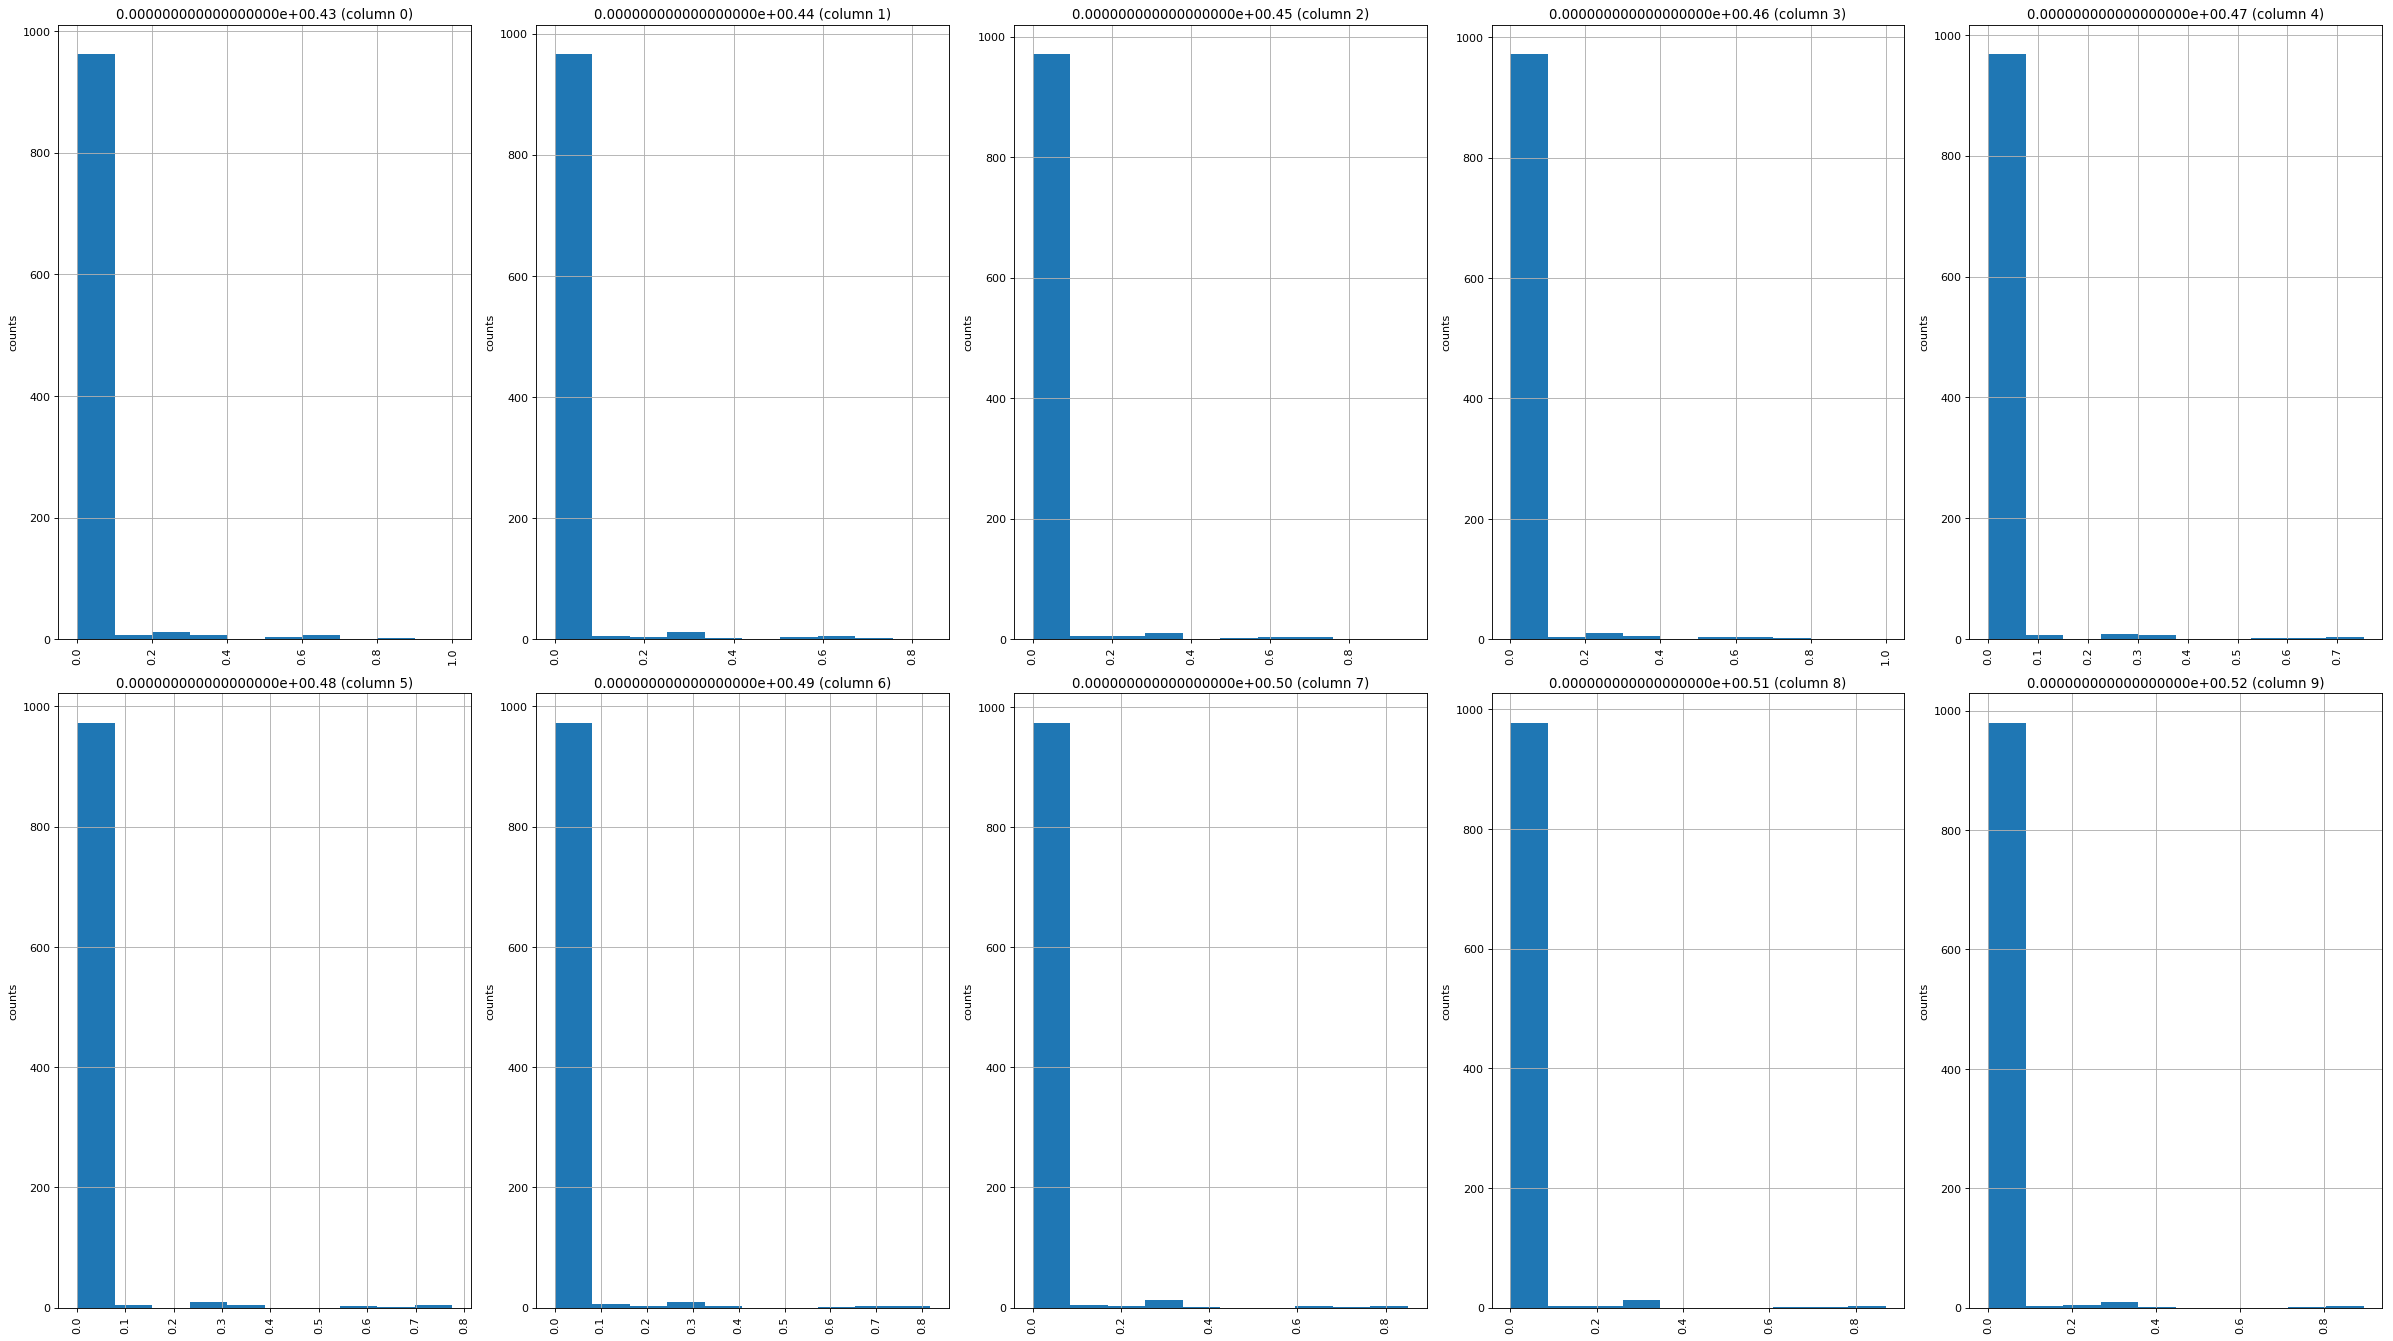

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

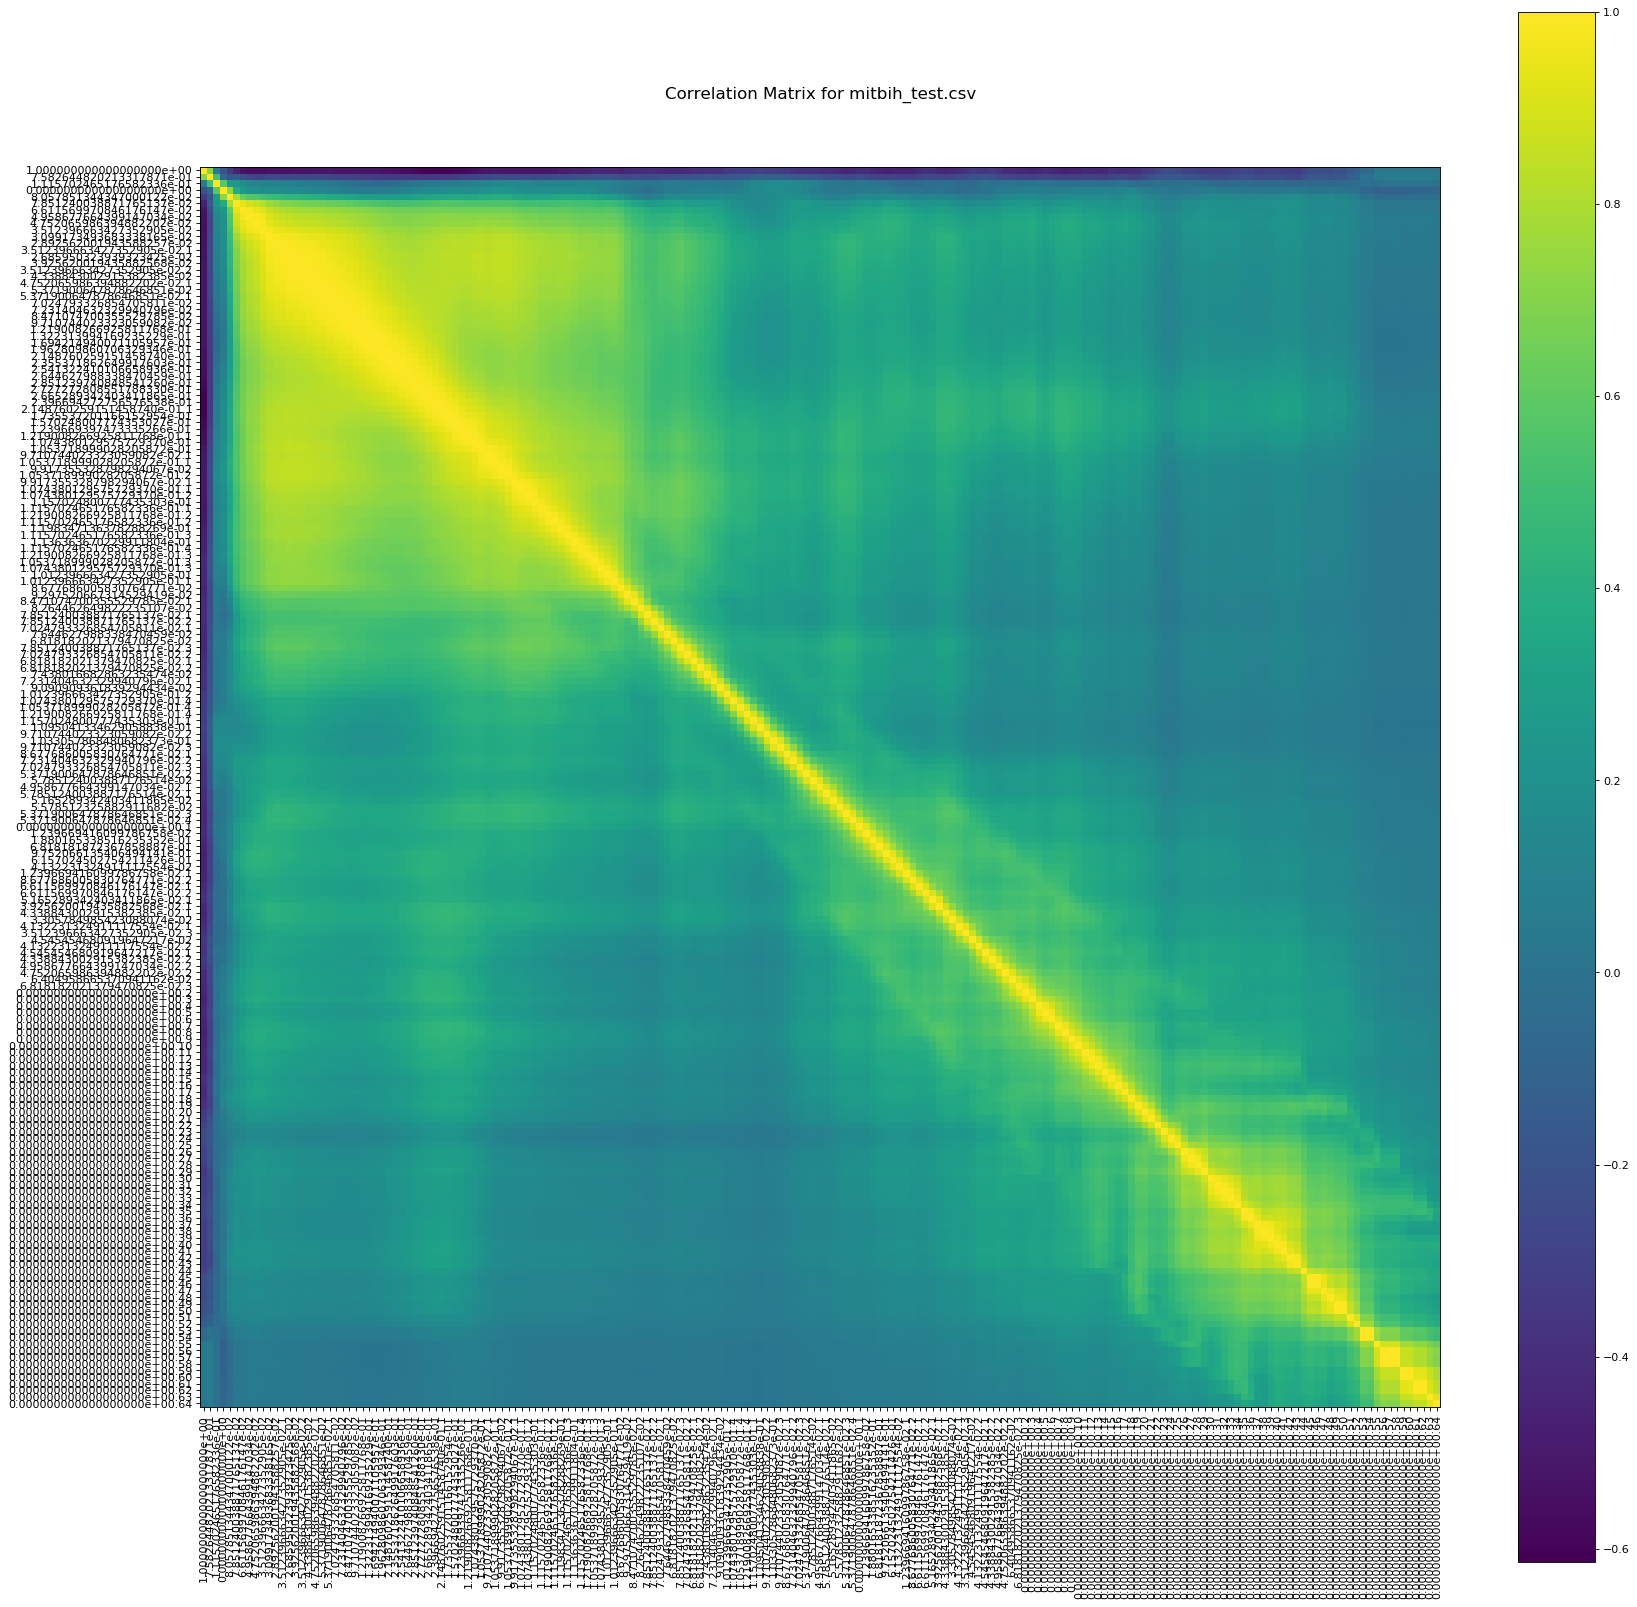

In [ ]:
plotCorrelationMatrix(df1, 25)

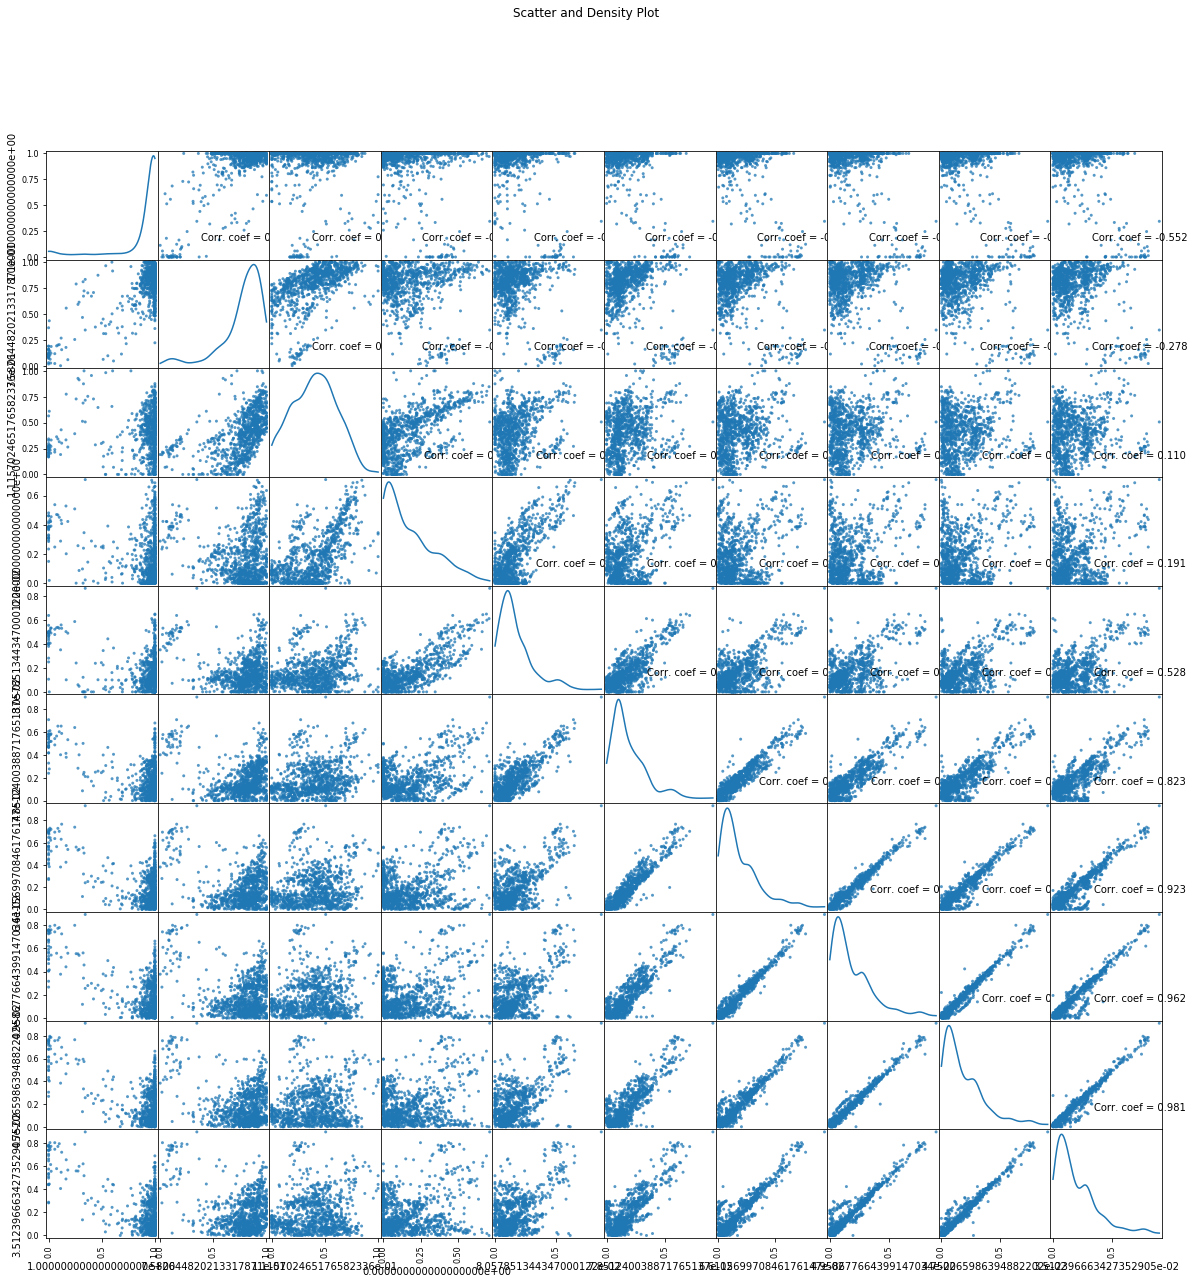

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/input/input/mitbih_train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'mitbih_train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


Let's take a quick look at what the data looks like:

In [ ]:
df2.head(5)

9.779411554336547852e-01  9.264705777168273926e-01  \
0                  0.960114                  0.863248   
1                  1.000000                  0.659459   
2                  0.925414                  0.665746   
3                  0.967136                  1.000000   
4                  0.927461                  1.000000   

   6.813725233078002930e-01  2.450980395078659058e-01  \
0                  0.461538                  0.196581   
1                  0.186486                  0.070270   
2                  0.541436                  0.276243   
3                  0.830986                  0.586854   
4                  0.626943                  0.193437   

   1.544117629528045654e-01  1.911764740943908691e-01  \
0                  0.094017                  0.125356   
1                  0.070270                  0.059459   
2                  0.196133                  0.077348   
3                  0.356808                  0.248826   
4                  0.094991                  0.072539   

   1.519607901573181152e-01  8.578431606292724609e-02  \
0                  0.099715                  0.088319   
1                  0.056757                  0.043243   
2                  0.071823                  0.060773   
3                  0.145540                  0.089202   
4                  0.043178                  0.053541   

   5.882352963089942932e-02  4.901960864663124084e-02  ...  \
0                  0.074074                  0.082621  ...   
1                  0.054054                  0.045946  ...   
2                  0.066298                  0.058011  ...   
3                  0.117371                  0.150235  ...   
4                  0.093264                  0.189983  ...   

   0.000000000000000000e+00.79  0.000000000000000000e+00.80  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.81  0.000000000000000000e+00.82  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.83  0.000000000000000000e+00.84  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.85  0.000000000000000000e+00.86  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.87  0.000000000000000000e+00.88  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

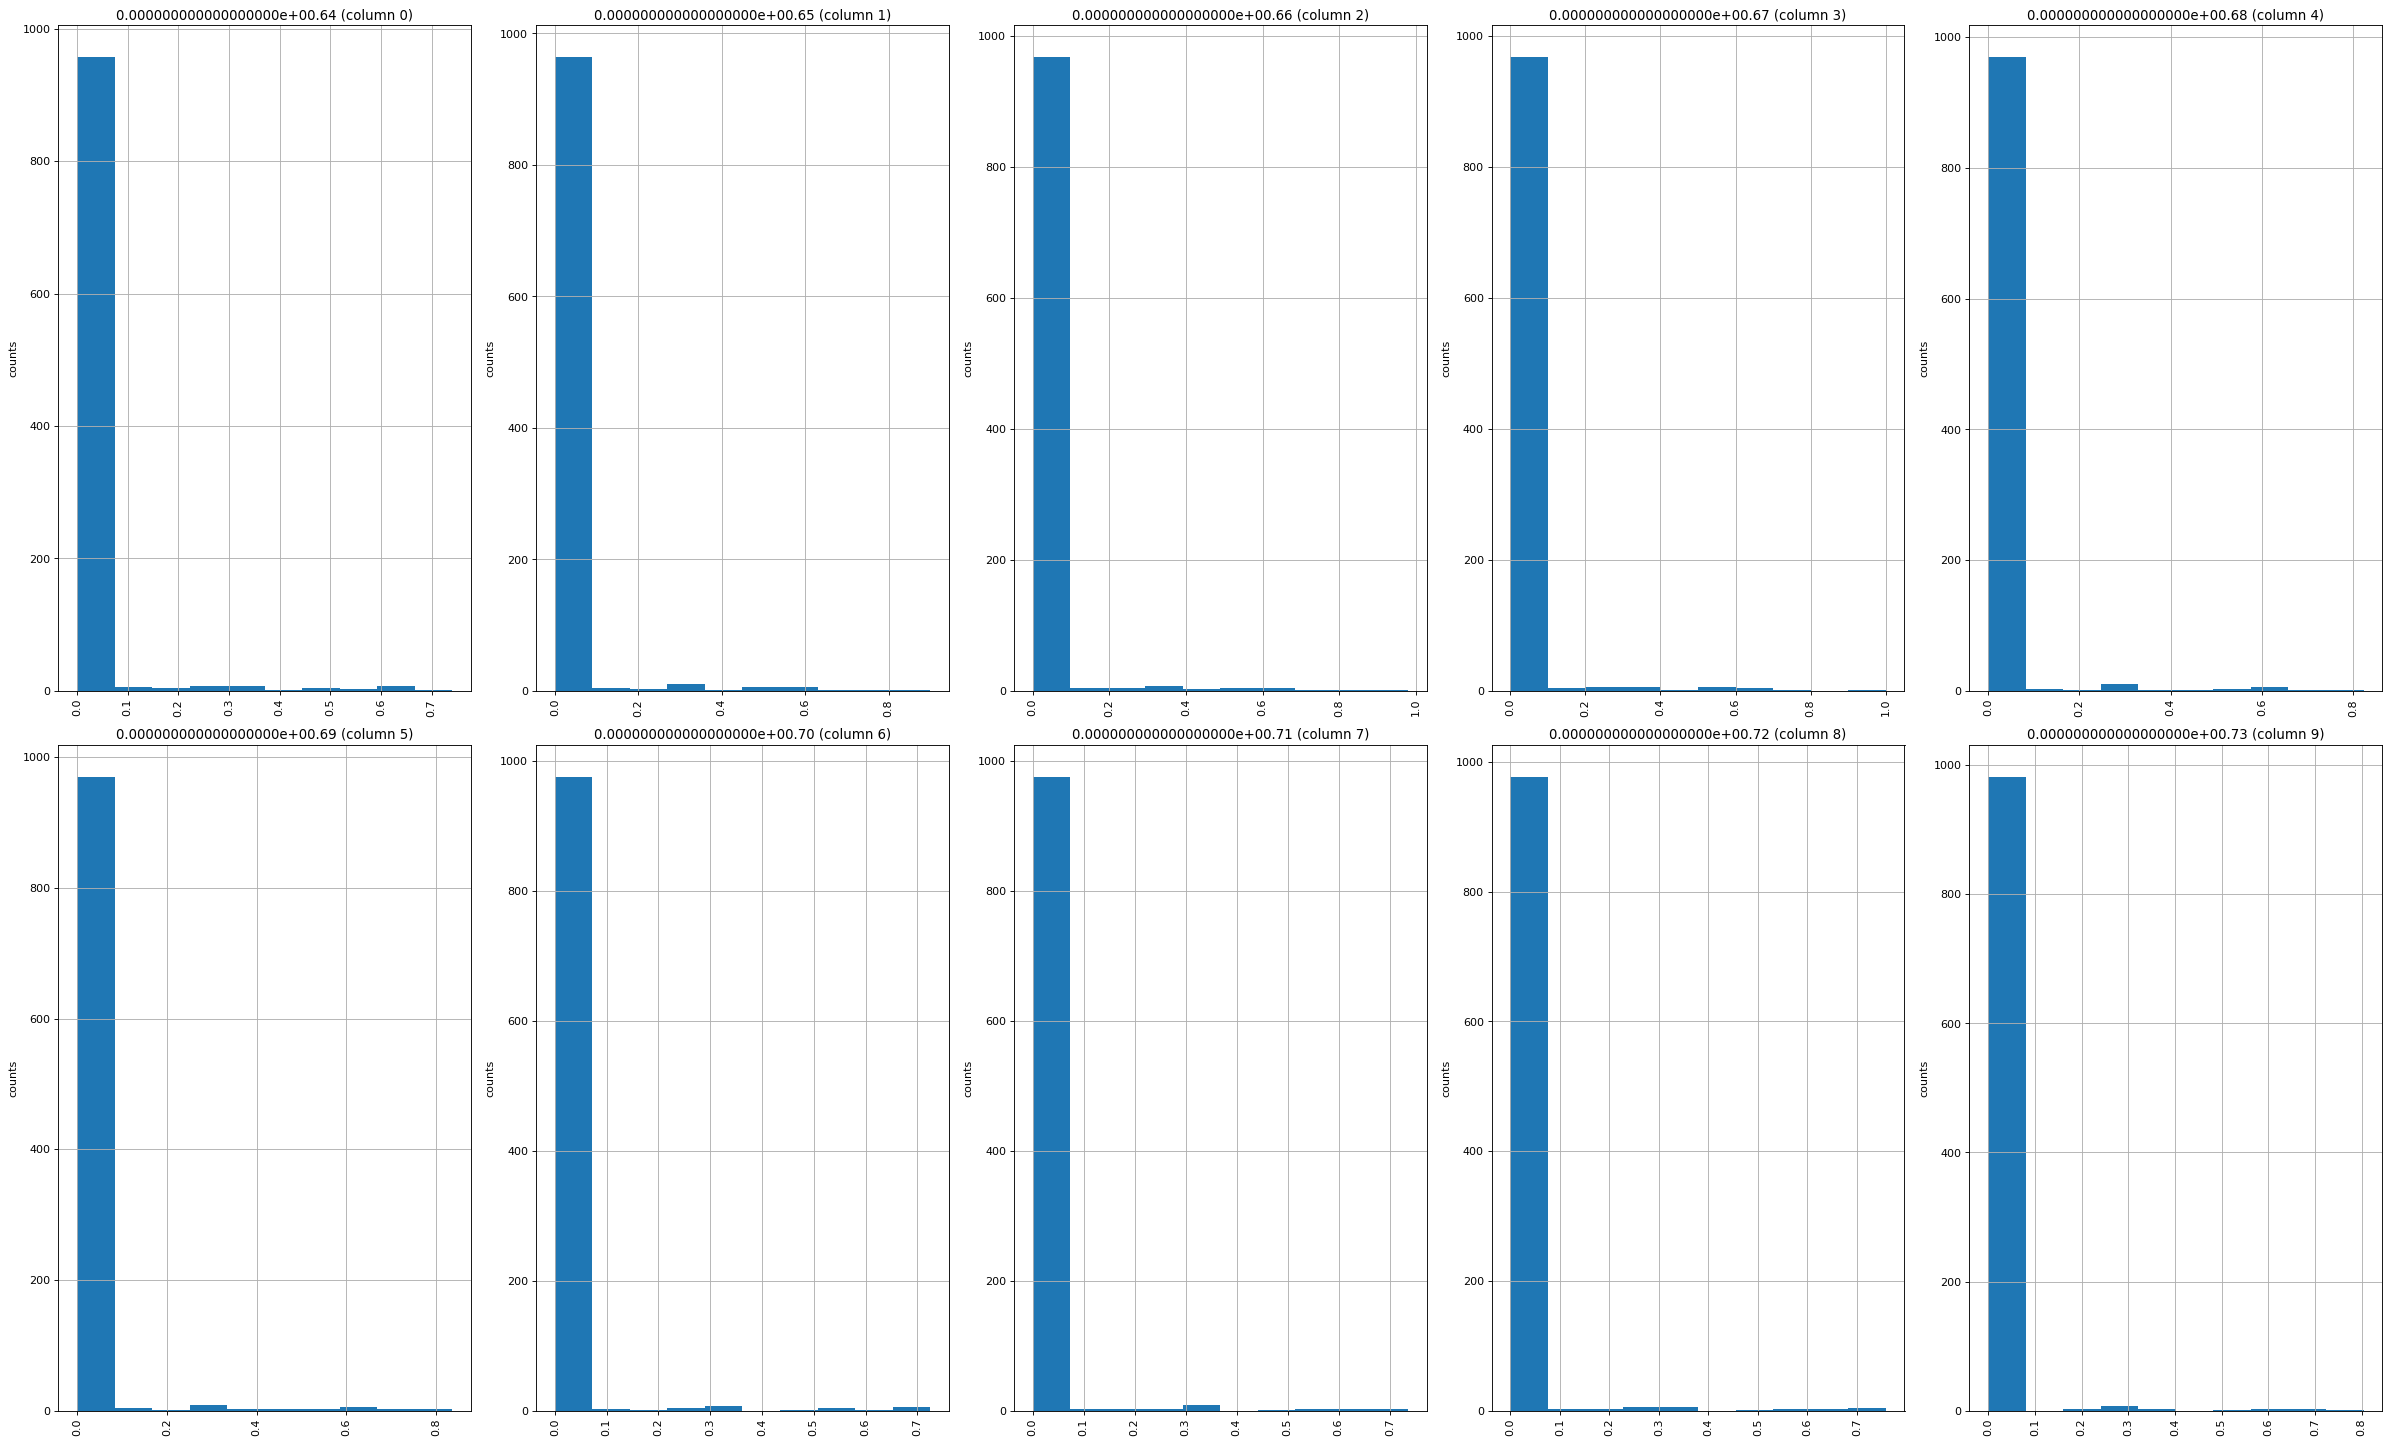

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

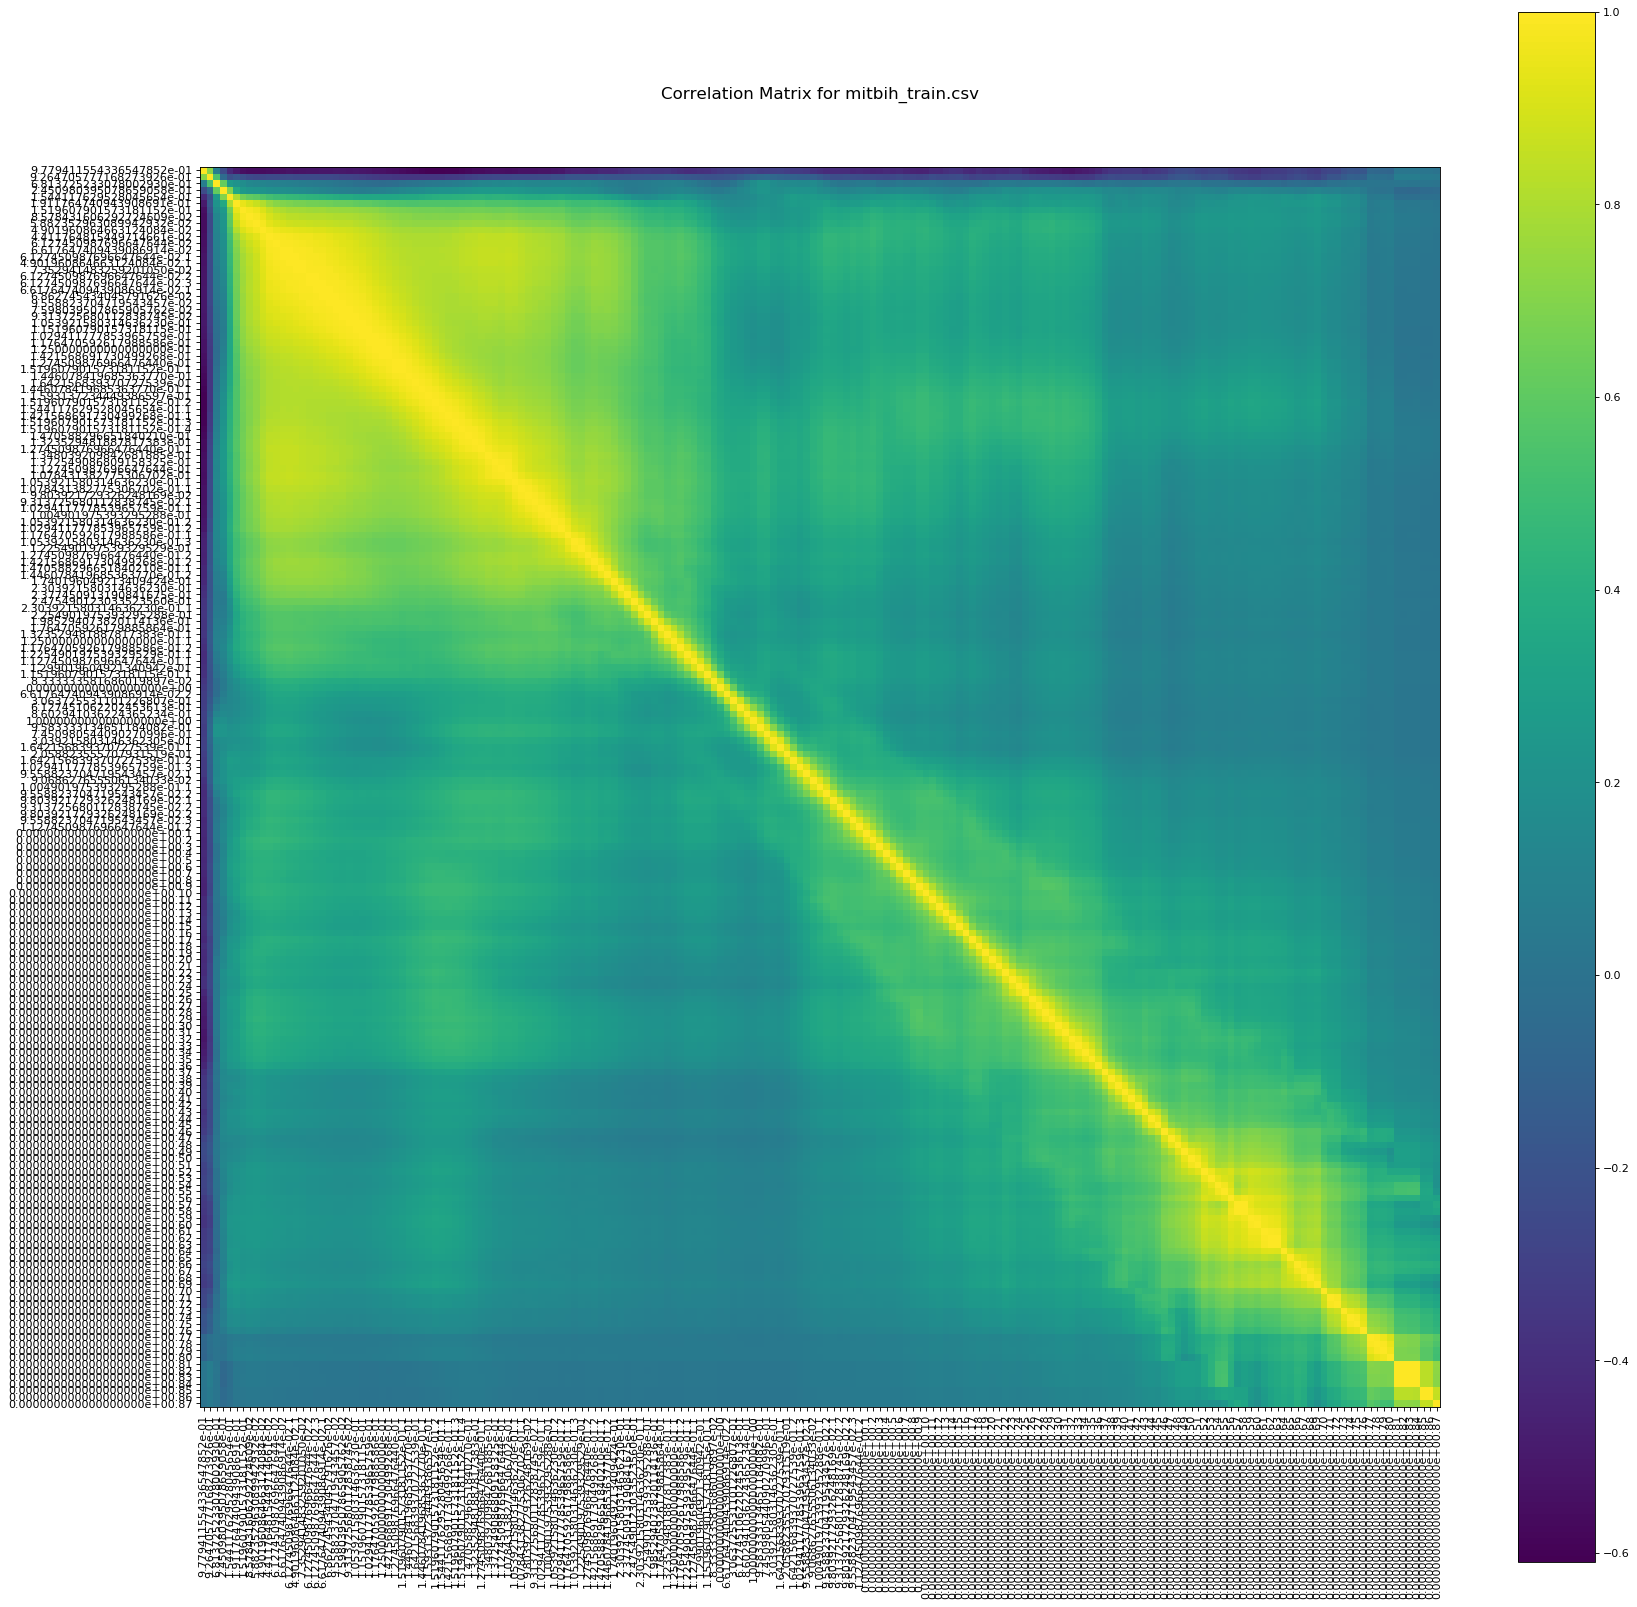

In [ ]:
plotCorrelationMatrix(df2, 25)

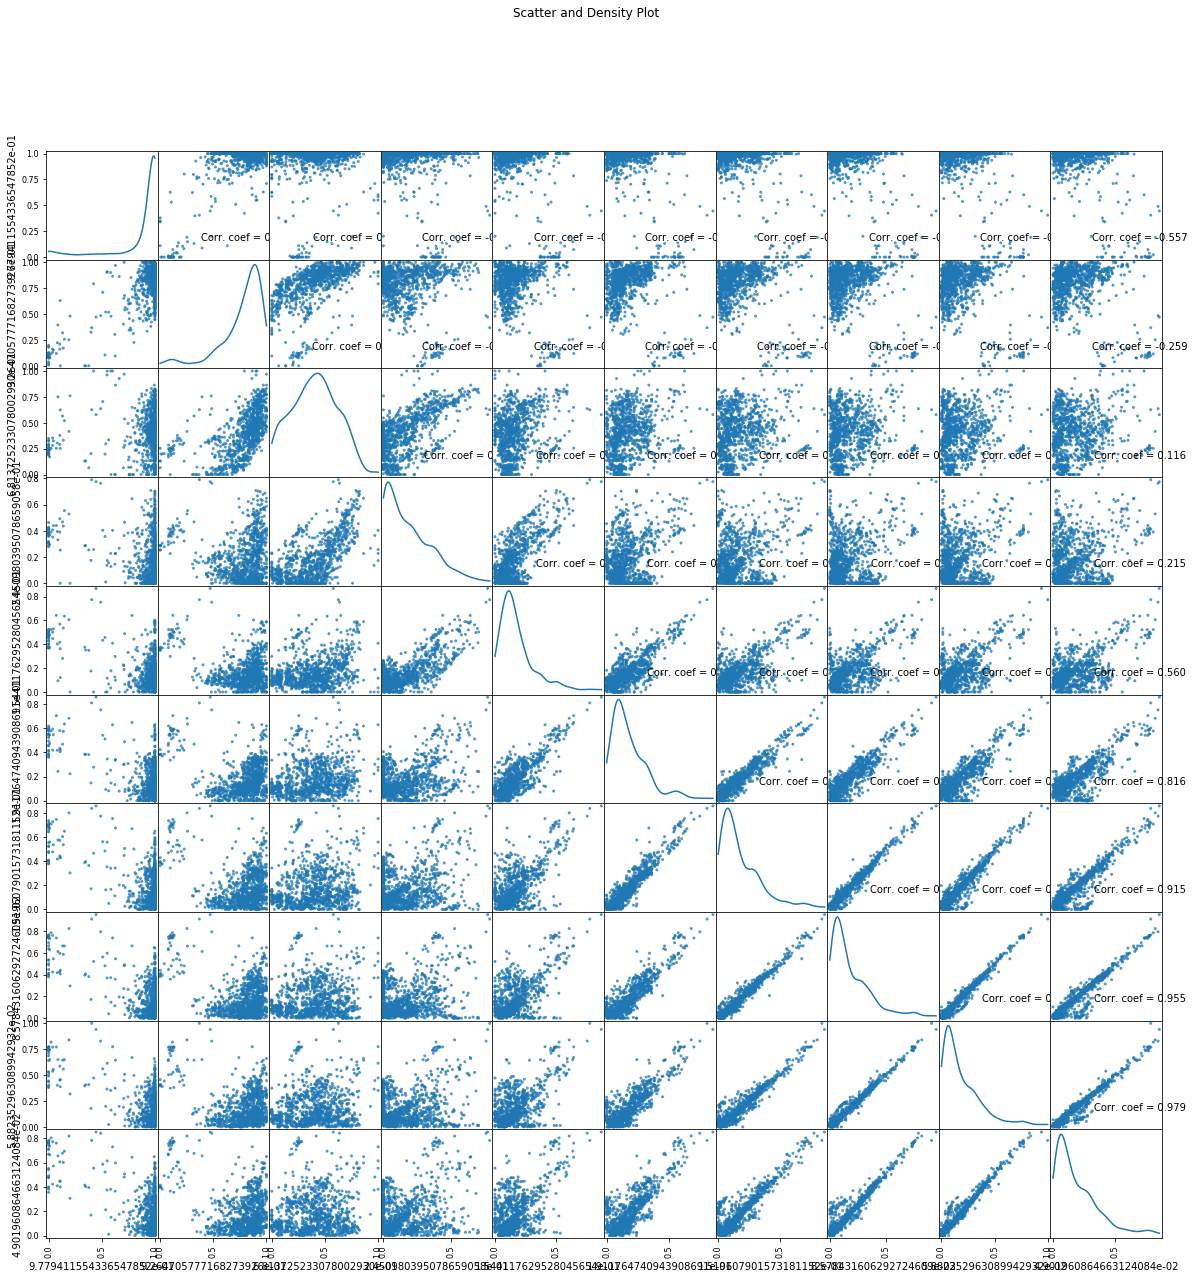

In [ ]:
plotScatterMatrix(df2, 20, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ptbdb_abnormal.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/input/input/ptbdb_abnormal.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'ptbdb_abnormal.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


Let's take a quick look at what the data looks like:

In [ ]:
df3.head(5)

9.322328567504882812e-01  8.696785569190979004e-01  \
0                  1.000000                  0.606941   
1                  1.000000                  0.951613   
2                  0.977819                  0.899261   
3                  0.935618                  0.801661   
4                  0.925265                  0.433352   

   8.861859440803527832e-01  9.296264052391052246e-01  \
0                  0.384181                  0.254237   
1                  0.923963                  0.853303   
2                  0.230129                  0.032348   
3                  0.805815                  1.000000   
4                  0.073620                  0.079197   

   9.087749719619750977e-01  9.339704513549804688e-01  \
0                  0.223567                  0.276836   
1                  0.791859                  0.734255   
2                  0.142329                  0.223660   
3                  0.722741                  0.480789   
4                  0.136643                  0.182934   

   8.010425567626953125e-01  7.497828006744384766e-01  \
0                  0.253430                  0.184826   
1                  0.672043                  0.685100   
2                  0.328096                  0.367837   
3                  0.454829                  0.319834   
4                  0.182934                  0.182376   

   6.872285008430480957e-01  6.350998878479003906e-01  ...  \
0                  0.153349                  0.121872  ...   
1                  0.670507                  0.667435  ...   
2                  0.381701                  0.389094  ...   
3                  0.266874                  0.308411  ...   
4                  0.196877                  0.203569  ...   

   0.000000000000000000e+00.117  0.000000000000000000e+00.118  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.119  0.000000000000000000e+00.120  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.121  0.000000000000000000e+00.122  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.123  0.000000000000000000e+00.124  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.125  1.000000000000000000e+00.1  
0                           0.0                         1.0  
1                           0.0                         1.0  
2                           0.0                         1.0  
3                           0.0                         1.0  
4                           0.0                         1.0  

[5 rows x 188 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

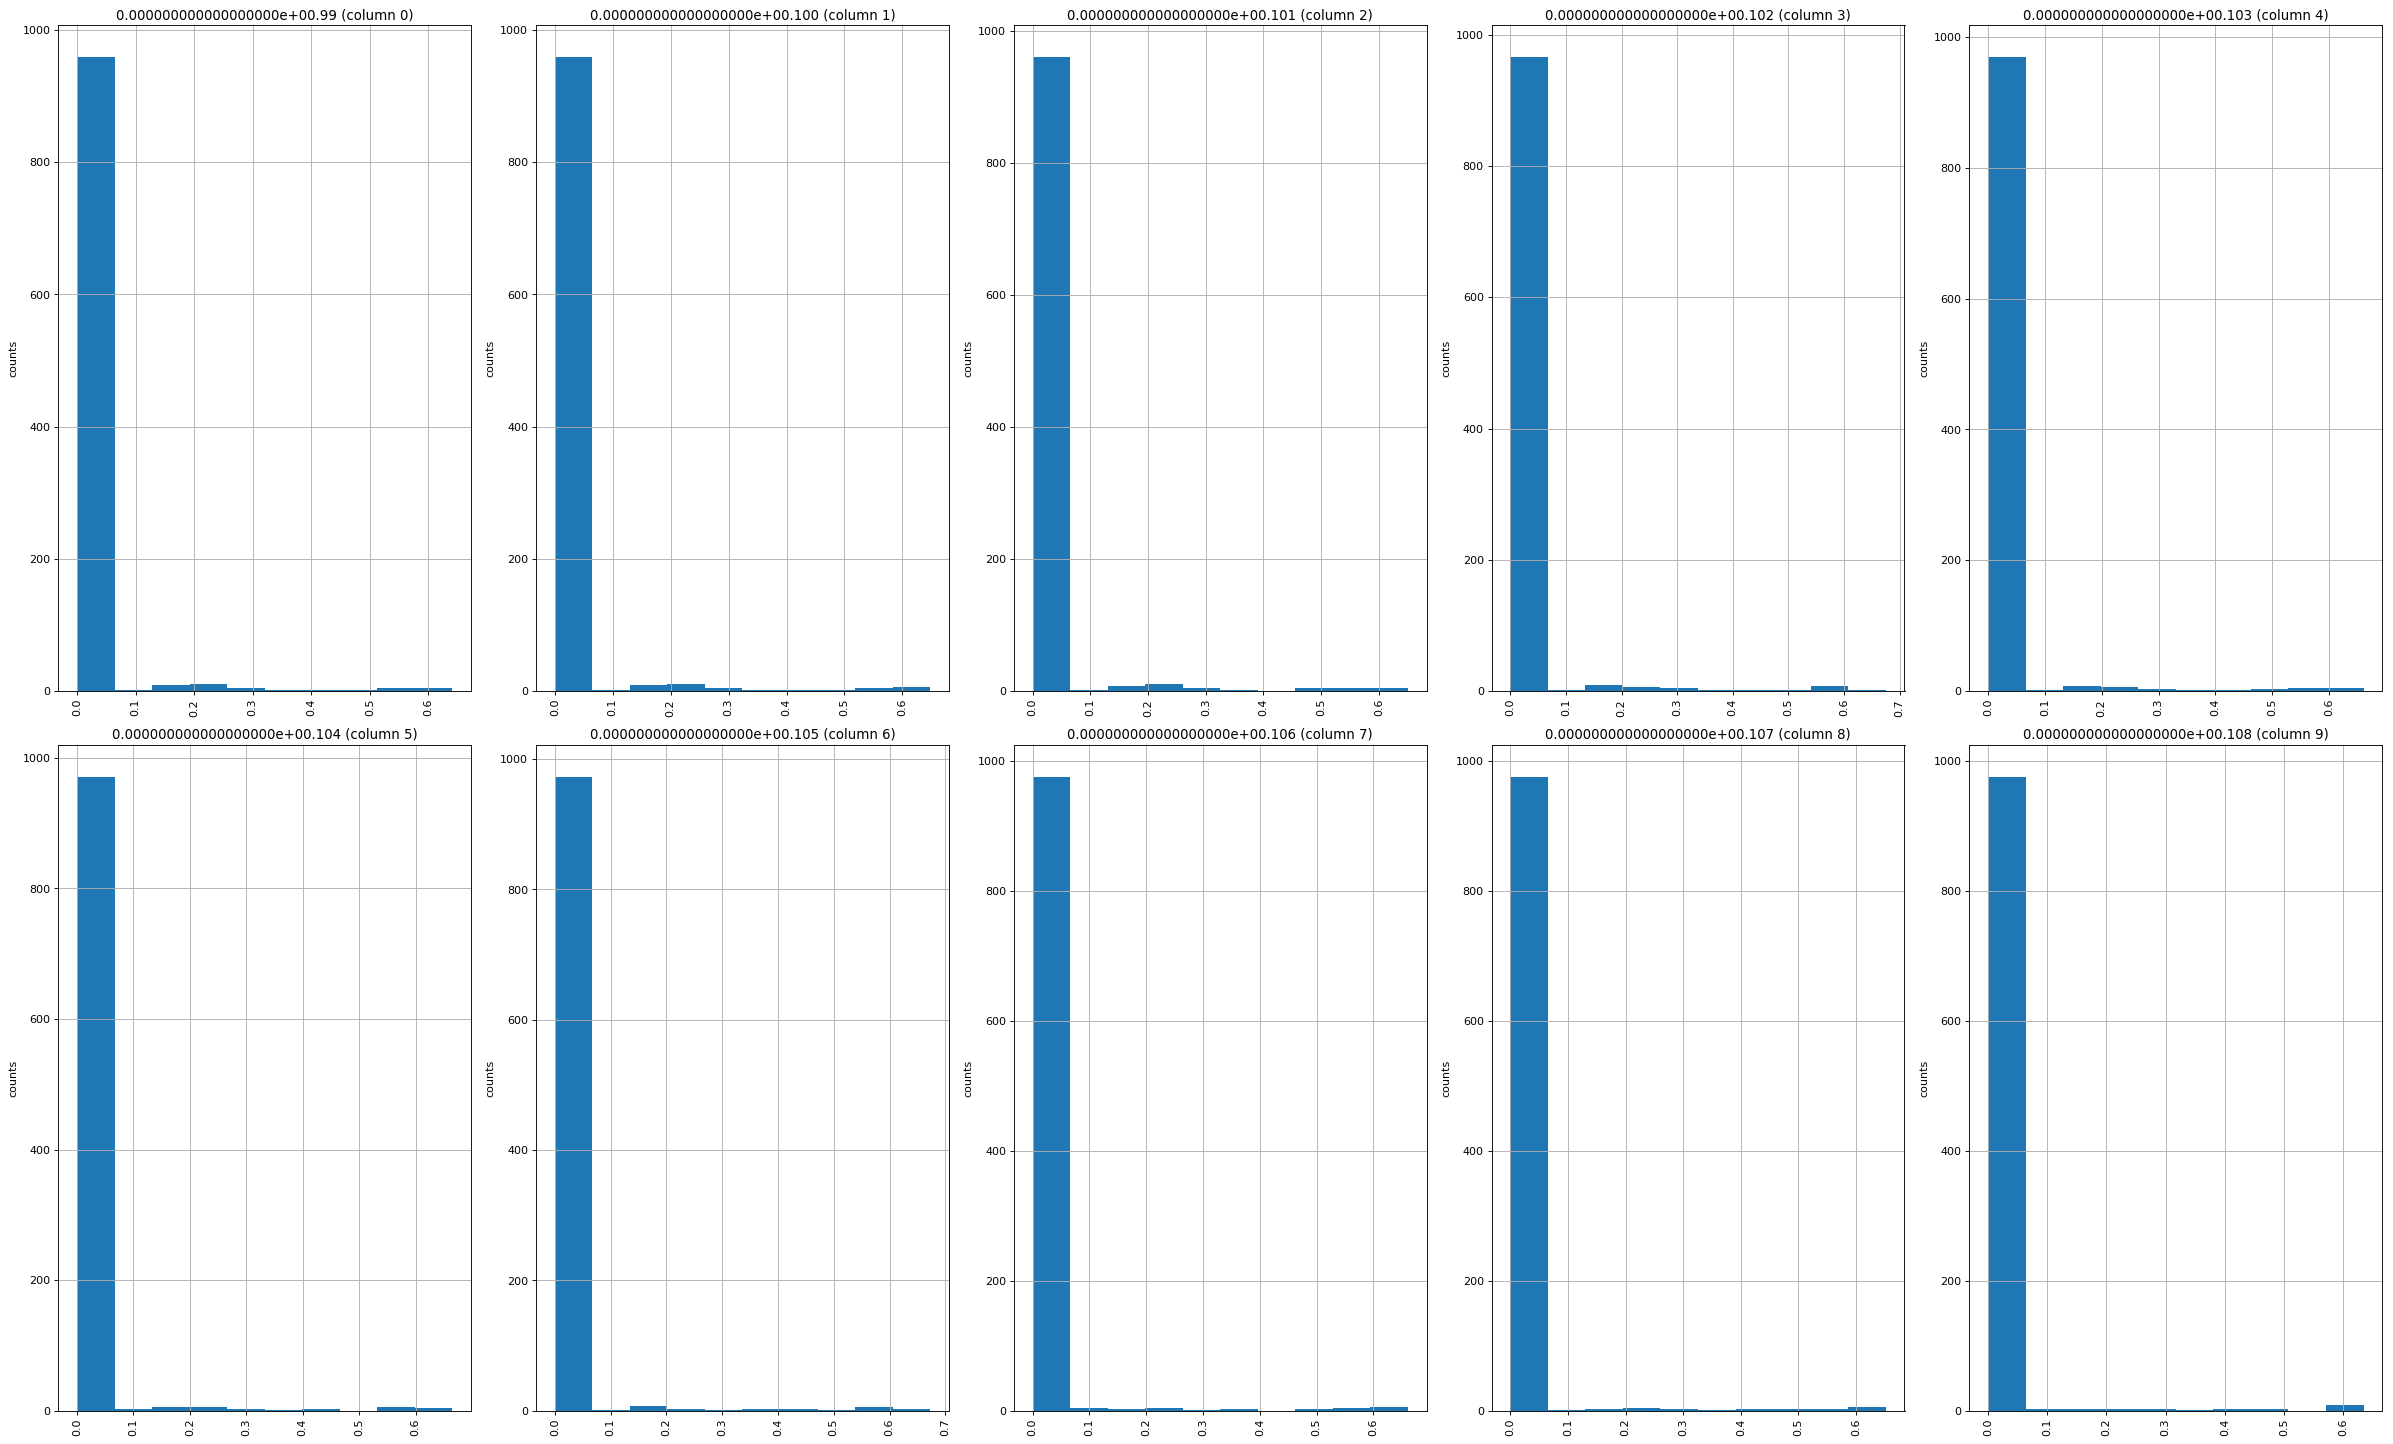

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

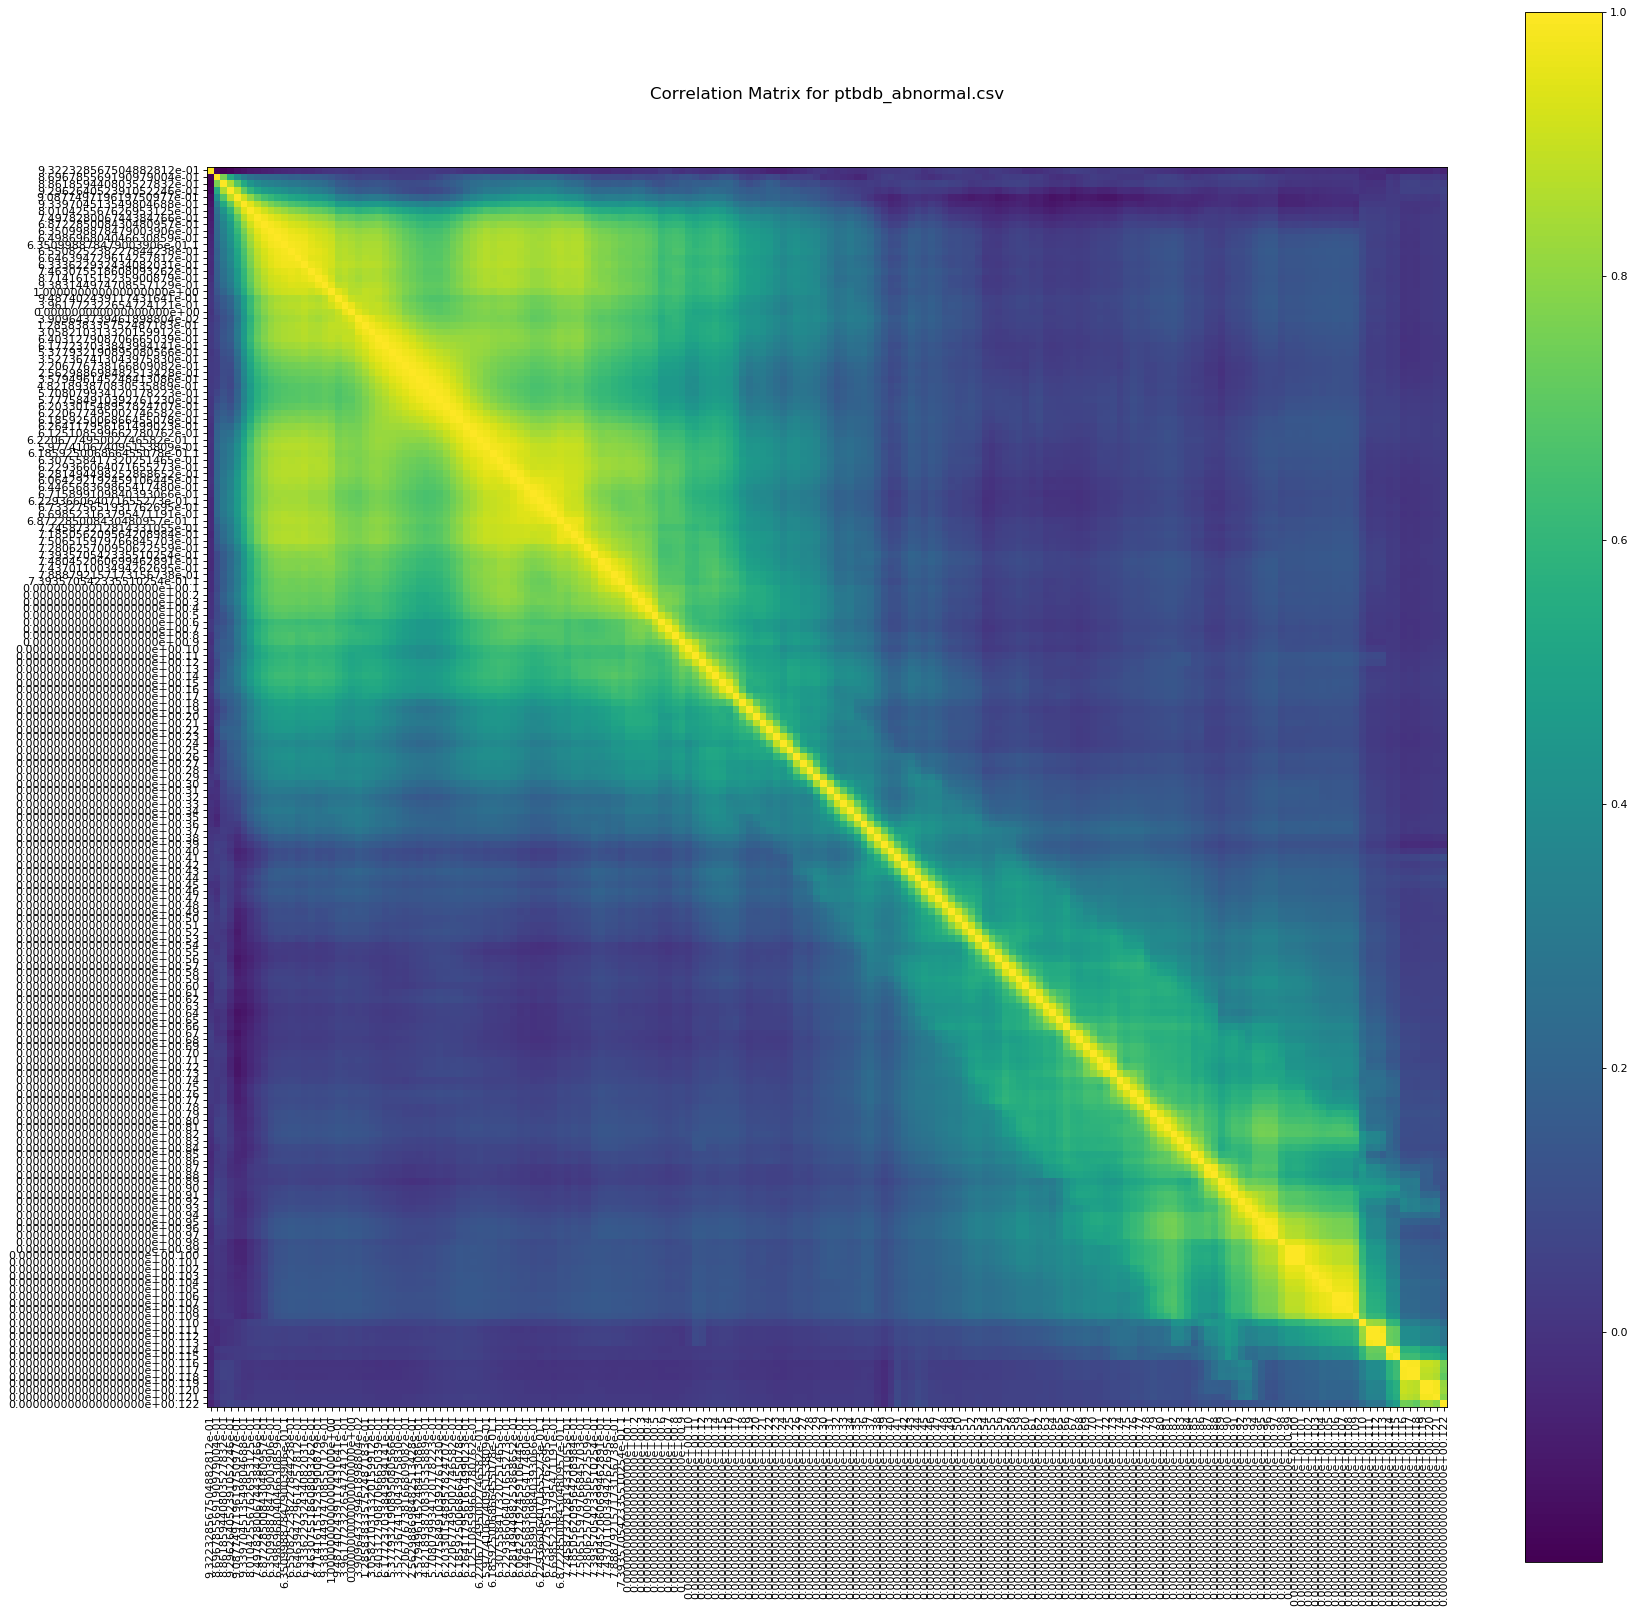

In [ ]:
plotCorrelationMatrix(df3, 25)

Scatter and density plots:

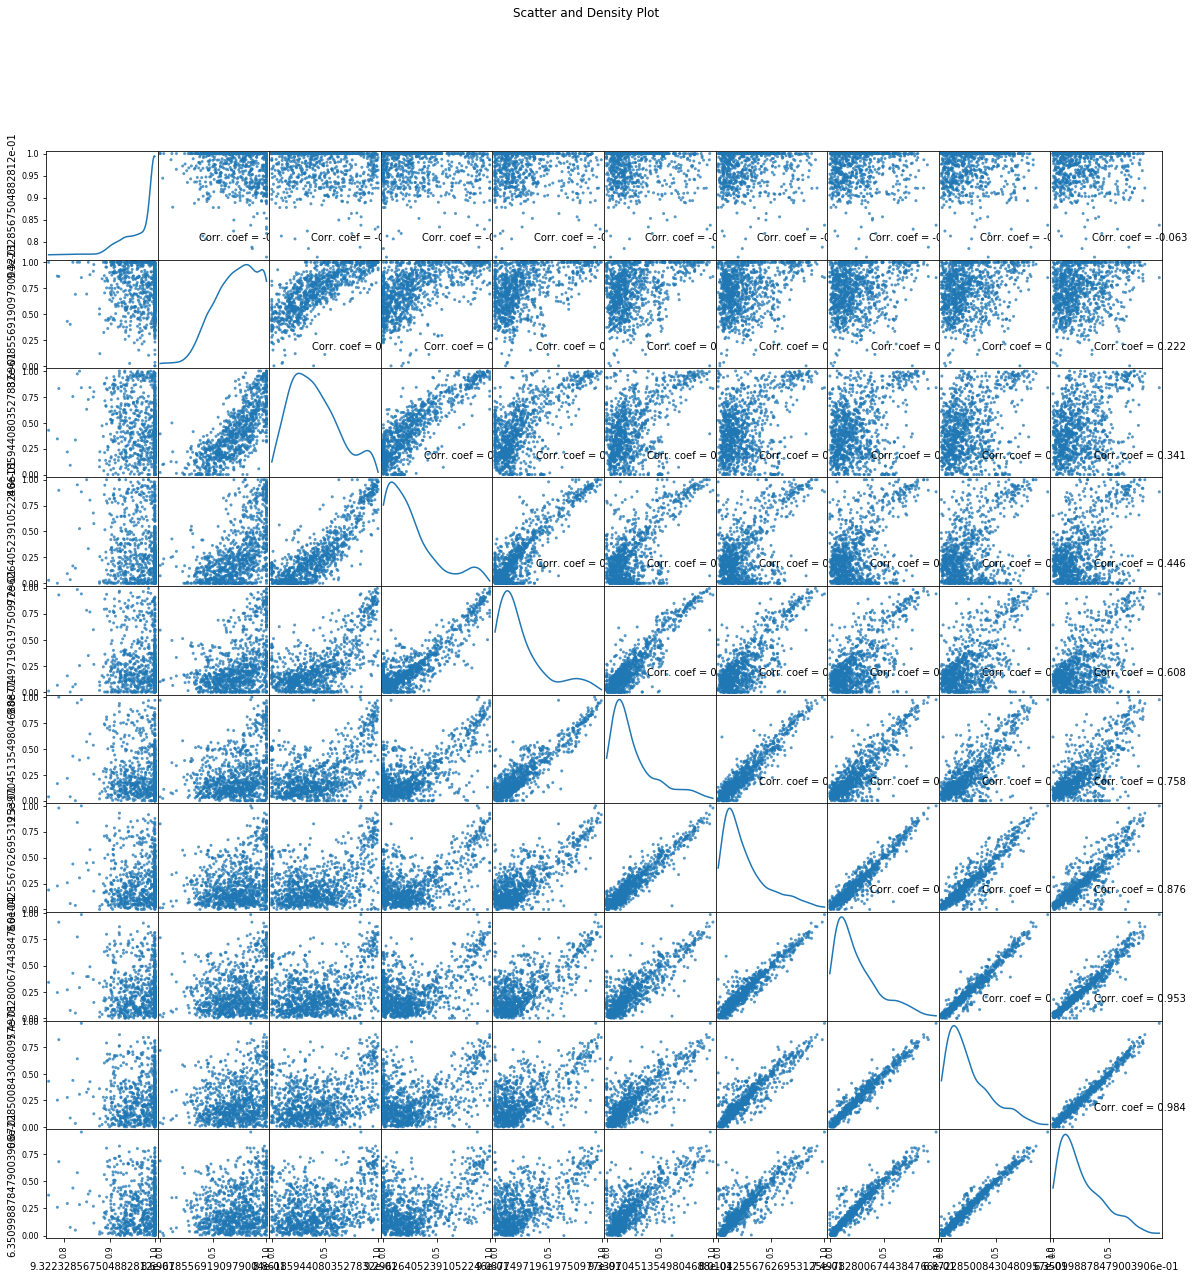

In [ ]:
plotScatterMatrix(df3, 20, 10)